In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../Life_Expectancy_preprocessed_v2.csv", index_col=0)

In [3]:
data.head()

,Country,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Life expectancy
0,Afghanistan,2015,263,62,0.01,71.279624,65,1154,19.1,83,...,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,65.0
1,Afghanistan,2014,271,64,0.01,73.523582,62,492,18.6,86,...,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,59.9
2,Afghanistan,2013,268,66,0.01,73.219243,64,430,18.1,89,...,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,59.9
3,Afghanistan,2012,272,69,0.01,78.184215,67,2787,17.6,93,...,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,59.5
4,Afghanistan,2011,275,71,0.01,7.097109,68,3013,17.2,97,...,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,59.2


### EDA

In [4]:
data.columns

Index(['Country', 'Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed', 'Life expectancy'],
      dtype='object')

We don't need a country name and year while clustering

In [5]:
input_data = data.iloc[:, 2:]

In [6]:
input_data.head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Life expectancy
0,263,62,0.01,71.279624,65,1154,19.1,83,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,65.0
1,271,64,0.01,73.523582,62,492,18.6,86,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,59.9
2,268,66,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,59.9
3,272,69,0.01,78.184215,67,2787,17.6,93,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,59.5
4,275,71,0.01,7.097109,68,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,59.2


'Developed == 0' means that it is developing country. Otherwise, it is developed country.


Let's hide 'Developed' feature and figure out that we can differentiate whether the country is 'Developed' or 'Developing'

In [7]:
input_data.drop(columns=['Developed'], inplace = True)

### Clustering

We need to scale the dataset.  
Becasue unscaled datasets affect clustering results due to differences in distances between dimensions.

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(input_data)

In [9]:
# Function for making silhoutette diagram

def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # Receives a list of clustering numbers as input, 
    # applies clustering to each number, and calculates the number of silhouettes.
    n_cols = len(cluster_lists)

    # Generate axes with sub figures as many as the number of clusters listed in the list with plt.subplots().
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # Visualize the number of silhouettes by sequentially iterating the clustering numbers listed in the list.
    for ind, n_cluster in enumerate(cluster_lists):

        # Perform KMeans clustering and calculate silhouette scores and silhouette values of individual data
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=42)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # Bar graph representation in fill_betweenx() format for each number of clusterings
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

c:\Users\MOONSOO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\MOONSOO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\MOONSOO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\MOONSOO\AppData\Local\Programs\Python\Python311\Lib\site-packages\skle

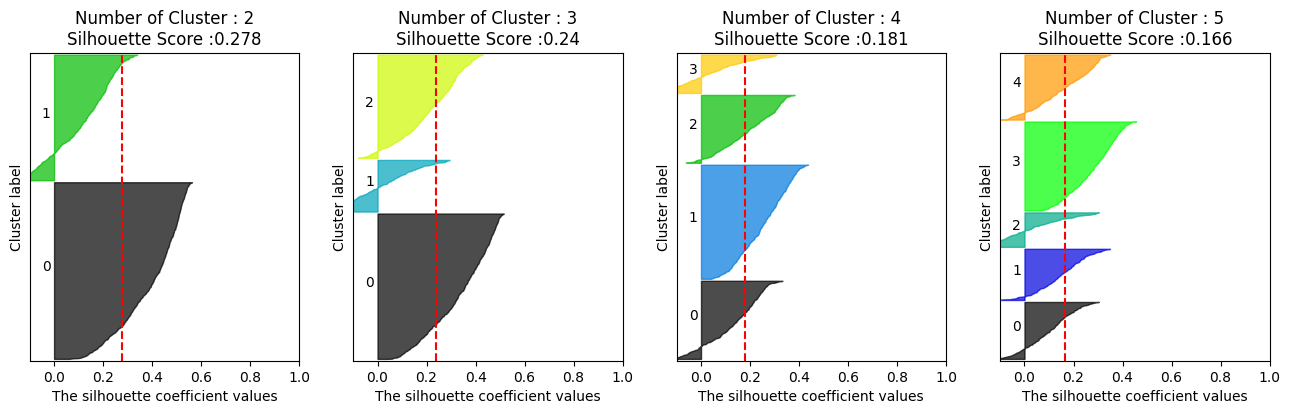

In [10]:
visualize_silhouette([2,3,4,5], scaled_data)

It seems silhouette diagram with 4 clusters shows godd result. Let's try 2 clusters.

! --------- !  
The way to interpret a silhouette diagram is first of all, each color represents a cluster.  
Clustering is judged to have been done well when all clusters exceed the red dotted line and the heights of the clusters are uniform.  
It's up to you which clusters you ultimately choose.

In [11]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters = 4, max_iter=500, random_state=0)
cluster_labels = clusterer.fit_predict(scaled_data)

# Although it's not left in the code, I also tried 2 clusters.
# The results weren't that good

c:\Users\MOONSOO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Visualize the clusters using T-SNE algorithm. 

This is one of the dimensionality reduction algorithms and is useful for visualization because it maintains the relative distance between data even after two-dimensional reduction.

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
transformed = tsne.fit_transform(scaled_data)

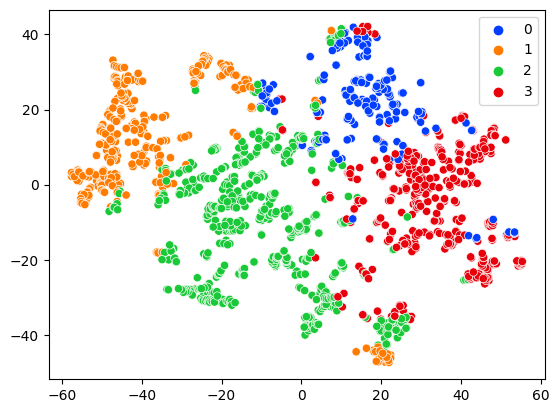

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("bright", 4)
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue = cluster_labels, legend='full', palette=palette)
plt.show()

See if it is really divided with 'Developed'.

In [14]:
developed = data['Developed']

C:\Users\MOONSOO\AppData\Local\Temp\ipykernel_16016\2828173225.py:1: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue = developed, legend='full', palette=palette)


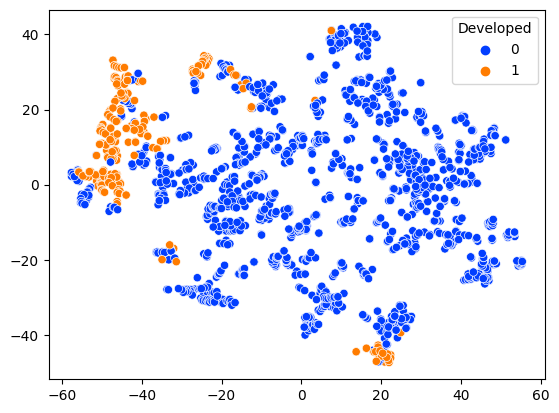

In [15]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue = developed, legend='full', palette=palette)
plt.show()

# Blue is Developig Country. Orange is Developed Country.

Cluster == 1 is similar with Developed country

C:\Users\MOONSOO\AppData\Local\Temp\ipykernel_16016\2669886377.py:2: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(x=transformed[:,0], y=transformed[:,1], style = cluster_labels, hue = developed, legend='full', palette=palette)


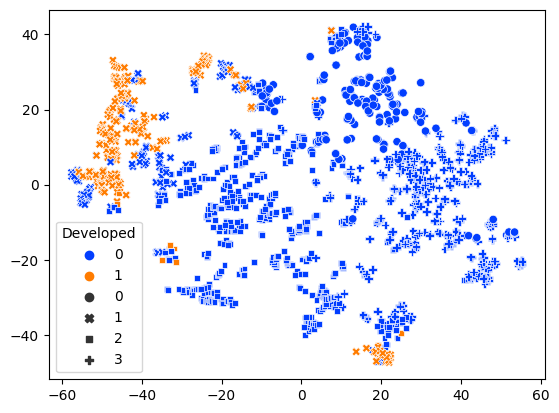

In [16]:
palette = sns.color_palette("bright", 4)
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], style = cluster_labels, hue = developed, legend='full', palette=palette)
plt.show()

### Interpretation of results

In [18]:
df_scaled = pd.DataFrame(data = scaled_data, columns = input_data.columns)
df_scaled['cluster'] = cluster_labels
groups = df_scaled.iloc[:, :].groupby('cluster').mean()

In [23]:
groups

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
cluster,,,,,,,,,,,,,,,,,,,
0,0.289726,0.061717,0.145796,0.010473,0.346951,0.035623,0.374516,0.066440,0.447284,0.320147,0.438771,0.056991,0.015806,0.027069,0.232886,0.228174,0.537298,0.351713,0.437124
1,0.134215,0.001678,0.572966,0.122071,0.848908,0.003919,0.692253,0.001486,0.950297,0.463220,0.954024,0.000197,0.141230,0.009650,0.050133,0.048923,0.881023,0.681395,0.751529
2,0.180969,0.009217,0.186077,0.016745,0.897071,0.016867,0.565631,0.008317,0.907409,0.372481,0.919116,0.004275,0.026909,0.006761,0.122117,0.118869,0.722350,0.500988,0.624455
3,0.359792,0.032075,0.129578,0.005997,0.825811,0.018933,0.230056,0.033919,0.838422,0.357129,0.851893,0.107273,0.009561,0.011613,0.331270,0.323360,0.496674,0.340190,0.371644


I tried to check the characteristics of the group, but the graph was too complicated.

<Figure size 1000x600 with 0 Axes>

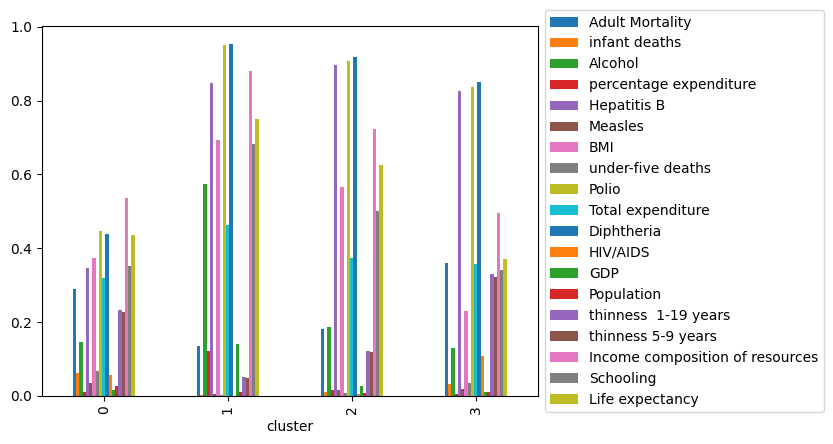

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
groups.plot(kind = 'bar')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # bbox_to_anchor를 사용하여 범례 위치 설정
plt.show()

The graph above it too complicated.  
So I wanna find out which features are important for the clusters

In [30]:
for i in range(4):
  print(f'group{i} =', list(groups.iloc[i, :].sort_values(ascending=False)[:5].index))
  print()

# Simply check the highest value per cluster

# However, I think this is not very reliable because clusters are not determined by high and low values, 
# but the distribution of similar values is important.

# So, I want to check the importance of variables through random forest.

group0 = ['Income composition of resources', 'Polio', 'Diphtheria', 'Life expectancy', 'BMI']

group1 = ['Diphtheria', 'Polio', 'Income composition of resources', 'Hepatitis B', 'Life expectancy']

group2 = ['Diphtheria', 'Polio', 'Hepatitis B', 'Income composition of resources', 'Life expectancy']

group3 = ['Diphtheria', 'Polio', 'Hepatitis B', 'Income composition of resources', 'Life expectancy']



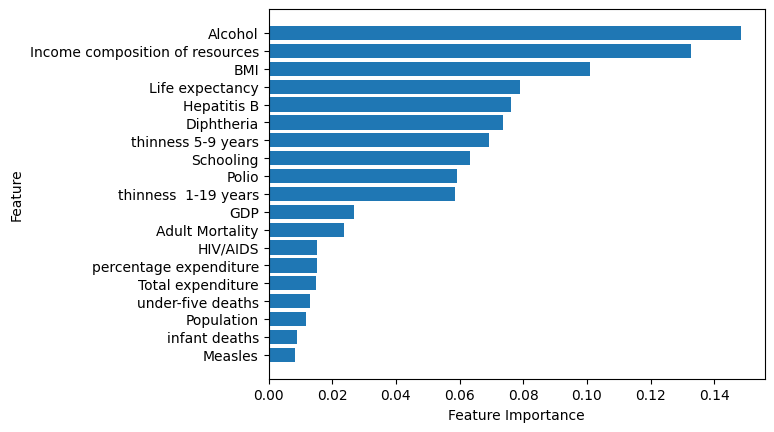

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

X = df_scaled.iloc[:, :-1]
y = df_scaled.iloc[:, -1]

# Use RandomForestClassifier to check the feature importances predicting clusters
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf_model.fit(X, y)

# Check feature importance
feature_importance = rf_model.feature_importances_
sorted_idx = feature_importance.argsort()

# Visualize
n_features = len(X.columns)
plt.barh(range(n_features), feature_importance[sorted_idx], align='center')
plt.yticks(range(n_features), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


In [53]:
# Now, let’s look at the characteristics of the cluster with the top 5 variables with high variable importance.

important_features = list(X.columns[sorted_idx])[-5:]

<Figure size 1000x600 with 0 Axes>

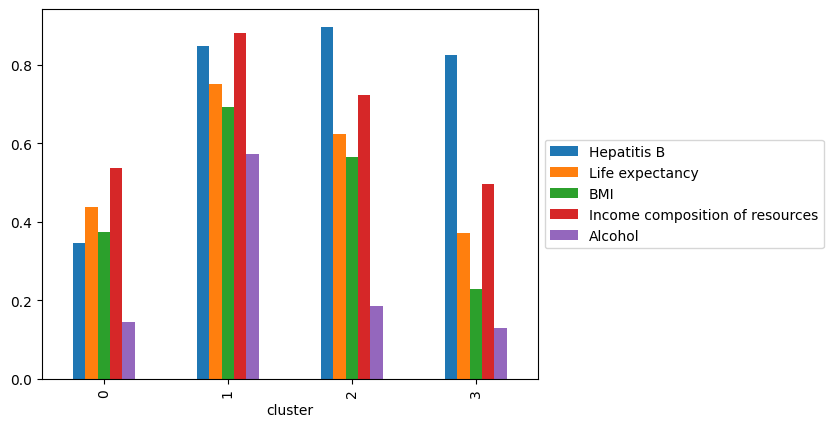

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
groups.loc[:, important_features].plot(kind = 'bar')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Group 1, which has a distribution similar to that of developed countries, has the highest life expectancy and BMI.  
What's interesting is that alcohol consumption is also the highest.

In [74]:
for i in range(4):
    print(f"Cluster {i} lists\n------------------------------------")

    df_ = data.iloc[df_scaled[df_scaled['cluster'] == i].index, [0, 1]]
    print(df_[df_['Year'] == 2014])
    print()

# Most recent year

Cluster 0 lists
------------------------------------
                       Country  Year
513   Central African Republic  2014
529                       Chad  2014
577                   Colombia  2014
835          Equatorial Guinea  2014
947                      Gabon  2014
1075                    Guinea  2014
1123                     Haiti  2014
1203                 Indonesia  2014
1491                   Liberia  2014
1894                   Nigeria  2014
1960                    Panama  2014
2394              South Africa  2014
2634                     Tonga  2014
2731                   Ukraine  2014

Cluster 1 lists
------------------------------------
                 Country  Year
81             Argentina  2014
113            Australia  2014
129              Austria  2014
225              Belarus  2014
241              Belgium  2014
353               Brazil  2014
385             Bulgaria  2014
497               Canada  2014
545                Chile  2014
642              Croatia  20

In general, clustering is unsupervised learning, so it does not compare to a specific target label like now.  
However, using clustering, you can group data with features you might consider less important or just miss and use it for marketing purposes.  
For example, you can create new target groups by grouping customers by characteristics.  
Therefore, it can be said that clustering algorithms can be very important in a company's management strategy.